<a href="https://colab.research.google.com/github/erangaj-iil/config_server/blob/main/hastha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow-gpu

     |████████████████████████████████| 489.6 MB 4.7 kB/s 


In [3]:
import tensorflow as tf
tf.__version__

'2.7.0'

In [4]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [5]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/dataset hastha new/train'
valid_path = '/content/drive/MyDrive/dataset hastha new/test'

In [6]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 1s 0us/step


In [7]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [8]:
folders = glob('/content/drive/MyDrive/dataset hastha new/train/*')

In [9]:
x = Flatten()(inception.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [11]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [12]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset hastha new/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2500 images belonging to 5 classes.


In [15]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/dataset hastha new/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                             class_mode = 'categorical')

Found 1500 images belonging to 5 classes.


In [16]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
79/79 [==============================] - 893s 11s/step - loss: 2.3983 - accuracy: 0.8084 - val_loss: 0.1097 - val_accuracy: 0.9740
Epoch 2/10
79/79 [==============================] - 429s 5s/step - loss: 0.1142 - accuracy: 0.9736 - val_loss: 0.0873 - val_accuracy: 0.9793
Epoch 3/10
79/79 [==============================] - 428s 5s/step - loss: 0.0602 - accuracy: 0.9880 - val_loss: 0.0072 - val_accuracy: 0.9980
Epoch 4/10
79/79 [==============================] - 427s 5s/step - loss: 0.0368 - accuracy: 0.9892 - val_loss: 0.0721 - val_accuracy: 0.9787
Epoch 5/10
79/79 [==============================] - 427s 5s/step - loss: 0.0433 - accuracy: 0.9916 - val_loss: 0.0667 - val_accuracy: 0.9853
Epoch 6/10
79/79 [==============================] - 428s 5s/step - loss: 0.0249 - accuracy: 0.9940 - val_loss: 0.0186 - val_accuracy: 0.9960
Epoch 7/10
79/79 [==============================] - 429s 5s/step - loss: 0.0312 - accuracy: 0.9952 - val_loss: 0.0536 - val_accuracy: 0.9847
Epoch 8/10
7

In [17]:
import matplotlib.pyplot as plt

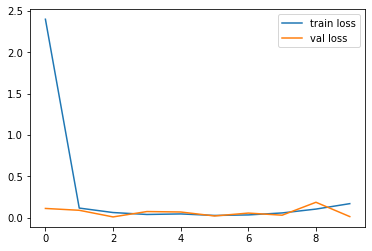

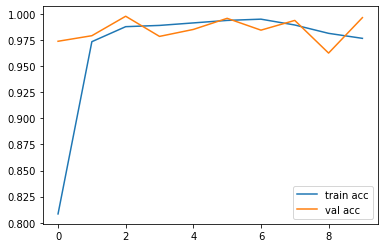

<Figure size 432x288 with 0 Axes>

In [18]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [20]:
y_pred = model.predict(test_set)


In [21]:
y_pred

array([[7.4656604e-32, 1.0000000e+00, 3.6400270e-32, 2.4438714e-26,
        7.2570689e-29],
       [4.2386405e-26, 1.0000000e+00, 1.3606005e-15, 5.1960919e-16,
        1.5601465e-20],
       [1.0000000e+00, 0.0000000e+00, 2.7665323e-35, 3.8449802e-28,
        1.9841676e-38],
       ...,
       [6.4020309e-26, 1.0000000e+00, 1.7369444e-12, 2.6622497e-23,
        8.0604285e-24],
       [1.7068272e-25, 1.0000000e+00, 1.0954301e-25, 2.4110403e-30,
        1.0548219e-29],
       [1.4389399e-23, 4.1703191e-25, 3.8961620e-17, 1.0000000e+00,
        2.0354072e-25]], dtype=float32)

In [22]:

import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [23]:
y_pred

array([1, 1, 0, ..., 1, 1, 3])